In [1]:
# Imports libraries 
import numpy as np
import matplotlib.pyplot as plt
import mujoco
import mujoco.viewer
import os
import mediapy as media
from tqdm import tqdm
import mujoco_viewer

# Robotics toolbox and dependencies
import roboticstoolbox as rtb
import spatialmath as sm
from spatialmath import UnitQuaternion, SE3
from spatialmath.base import q2r, r2x, rotx, roty, rotz, r2q, q2r
from mujoco_parser import MuJoCoParserClass

# Import local libraries
from Ur5e import Ur5e
from actuator import ActuatorMotor, update_actuator
from quaternion_helper import *

In [2]:
# Make ur5e instance
if 'ur5e' in locals():
    print('ur5e already exists')
    del ur5e

try:
    ur5e
except NameError:
    print('ur5e does not exist')
    ur5e = Ur5e()

ur5e does not exist


In [3]:
# Make actuator instance torque controlled
try:
    actuator
except NameError:
    actuator = ActuatorMotor()

forces_ctrl_range = np.array([[-150, 150], [-150, 150], [-150, 150], [-28, 28], [-28, 28], [-28, 28]])

for actuator_id in range(ur5e.m.nu):
    update_actuator(ur5e.m, actuator_id, actuator, ctrlrange=forces_ctrl_range[actuator_id])

In [4]:
# Visualize mujoco, Show initial state of the scene

# Use forward dynamics to get the initial state of the data
mujoco.mj_forward(ur5e.m, ur5e.d)
# render the initial state
if 'renderer' in locals():
    print('renderer already exists')
    del renderer


try:
    renderer
except NameError:
    renderer = mujoco.Renderer(ur5e.m, 480, 640)


#renderer.update_scene(ur5e.d, camera="fixed", scene_option=dict())
# show image
#media.show_image(renderer.render())

# Trajectory

In [5]:
poi = np.array([
    #[93, 243],
    [500, 550],
    [130, 243],
    [130, 223],
    [175, 223],
    [175, 263],
    [130, 263],
    [130, 223],
    [175, 223],
    [175, 243],
    [213, 243],
    [213, 223],
    [254, 223],
    [254, 164],
    [334, 164],
    [334, 144],
    [379, 144],
    [379, 184],
    [334, 184],
    [334, 144],
    
])

poi = poi + np.array([0, -281])

print(poi)
#plt.plot(poi[:, 0], poi[:, 1])
#plt.show()

'''
    [379, 144],
    [379, 164],
    [663, 164],
    [663, 271],
    [648, 271],
    [648, 289],
    [663, 289],
    [663, 392],
    [379, 392],
    [379, 372],
    [334, 372],
    [334, 412],
    [379, 412],
    [379, 372],
    [334, 372],
    [334, 392],
    [254, 392],
    [254, 339],
    [213, 339],
    [213, 319],
    [175, 319],
    [175, 339],
    [130, 339],
    [130, 319],
    [93, 319],
    [130, 319],
    [130, 299],
    [175, 299],
    [175, 319],
    [213, 319],
    [213, 299],
    [297, 299],
    [297, 339],
    [213, 339],
    [213, 299],
    [297, 299],
    [297, 319],
    [334, 319],
    [334, 299],
    [379, 299],
    [379, 339],
    [334, 339],
    [334, 299],
    [379, 299],
    [379, 319],
    [435, 319],
    [435, 292],
    [444, 281],
    [480, 281],
    [480, 261],
    [525, 261],
    [525, 281],
    [565, 281],
    [565, 301],
    [648, 301],
    [648, 261],
    [565, 261],
    [565, 281],
    [525, 281],
    [525, 301],
    [480, 301],
    [480, 281],
    [444, 281],
    [435, 272],
    [425, 281],
    [435, 292],
    [444, 281],
    [435, 272],
    [435, 243],
    [379, 243],
    [379, 263],
    [334, 263],
    [334, 243],
    [297, 243],
    [297, 263],
    [213, 263],
    [213, 223],
    [297, 223],
    [297, 243],
    [334, 243],
    [334, 223],
    [379, 223],
    [379, 243]
    '''

[[ 500  269]
 [ 130  -38]
 [ 130  -58]
 [ 175  -58]
 [ 175  -18]
 [ 130  -18]
 [ 130  -58]
 [ 175  -58]
 [ 175  -38]
 [ 213  -38]
 [ 213  -58]
 [ 254  -58]
 [ 254 -117]
 [ 334 -117]
 [ 334 -137]
 [ 379 -137]
 [ 379  -97]
 [ 334  -97]
 [ 334 -137]]


'\n    [379, 144],\n    [379, 164],\n    [663, 164],\n    [663, 271],\n    [648, 271],\n    [648, 289],\n    [663, 289],\n    [663, 392],\n    [379, 392],\n    [379, 372],\n    [334, 372],\n    [334, 412],\n    [379, 412],\n    [379, 372],\n    [334, 372],\n    [334, 392],\n    [254, 392],\n    [254, 339],\n    [213, 339],\n    [213, 319],\n    [175, 319],\n    [175, 339],\n    [130, 339],\n    [130, 319],\n    [93, 319],\n    [130, 319],\n    [130, 299],\n    [175, 299],\n    [175, 319],\n    [213, 319],\n    [213, 299],\n    [297, 299],\n    [297, 339],\n    [213, 339],\n    [213, 299],\n    [297, 299],\n    [297, 319],\n    [334, 319],\n    [334, 299],\n    [379, 299],\n    [379, 339],\n    [334, 339],\n    [334, 299],\n    [379, 299],\n    [379, 319],\n    [435, 319],\n    [435, 292],\n    [444, 281],\n    [480, 281],\n    [480, 261],\n    [525, 261],\n    [525, 281],\n    [565, 281],\n    [565, 301],\n    [648, 301],\n    [648, 261],\n    [565, 261],\n    [565, 281],\n    [525, 28

In [6]:
# Generate trajectory

#startpos = np.array([0, 0, 0])
T0 = sm.SE3.Trans(0.0, 0, 0.301) * sm.SE3.RPY([0, np.pi, 0]) # sm.SE3.Trans(0.5, 0, 0.3) * sm.SE3.RPY([0, np.pi, 0]) changed z from 0.3 to 0.4 to avoid collision
T1 = sm.SE3.Trans(0.0, 0, 0.301) * sm.SE3.RPY([0, np.pi, 0])
dt = 0.002 
endTime = 0.3
n = int(endTime/dt)

if 'ctr' not in locals():
    ctr = np.array([])
    times = np.array([])
    startTime = 0
    scalingX = 5000
    scalingY = 2500
    movementX = 0.4
    movementY = 0.0



    for i in tqdm(range(0, poi.shape[0]-1)):
        distance = np.sqrt((poi[i+1, 0] - poi[i, 0])**2 + (poi[i+1, 1] - poi[i, 1])**2)
        endTime = distance*0.05
        n = int(endTime/dt)
        T0.t[0] = movementX + poi[i, 0]/scalingX
        T0.t[1] = movementY + poi[i, 1]/scalingY
        T1.t[0] = movementX + poi[i+1, 0]/scalingX
        T1.t[1] = movementY + poi[i+1, 1]/scalingY
        trajectory = rtb.ctraj(T0, T1, n)
        time = np.linspace(startTime, startTime+endTime, n)
        startTime = startTime+endTime
        if i == 0:
            ctr = trajectory
            times = time
        else:
            x = ctr.Alloc(len(ctr)+len(trajectory))
            for j in range(0, len(ctr)):
                x[j] = ctr[j]
            for j in range(0, len(trajectory)):
                x[j+len(ctr)] = trajectory[j]
            ctr = x
            times = np.append(times, time)



    #differentiate to find velocity
    velocityX = np.gradient(ctr.t[:,0])
    velocityY = np.gradient(ctr.t[:,1])
    velocityZ = np.gradient(ctr.t[:,2])

    velocity = np.transpose(np.array([velocityX, velocityY, velocityZ]))

    #differentiate to find acceleration
    accelerationX  = np.gradient(velocityX)
    accelerationY  = np.gradient(velocityY)
    accelerationZ  = np.gradient(velocityZ)

    acceleration = np.transpose(np.array([accelerationX, accelerationY, accelerationZ]))        
    print(f"No of points in trajectory: {len(ctr)}") 


  0%|          | 0/18 [00:00<?, ?it/s]

100%|██████████| 18/18 [00:03<00:00,  5.12it/s]


No of points in trajectory: 29094


In [7]:
'''
# Visualize trajectory
fig, axs = plt.subplots(1, 1, figsize=(10, 10))
axs.plot(ctr.t[:,0], ctr.t[:,1])
axs.set_title("Trajectory in XY plane")
axs.set_aspect(1)



fig, axs = plt.subplots(3, 1, figsize=(10, 10))
fig.suptitle('Pos, Velocity and Acceleration in X direction')
axs[0].plot(times, ctr.t[:,0])
axs[0].set_title('Position in X direction')
axs[1].plot(times, velocity[:,0])
axs[1].set_title('Velocity in X direction')
axs[2].plot(times, acceleration[:,0])
axs[2].set_title('Acceleration in X direction')

fig, axs = plt.subplots(3, 1, figsize=(10, 10))
fig.suptitle('Pos, Velocity and Acceleration in Y direction')
axs[0].plot(times, ctr.t[:,1])
axs[0].set_title('Position in Y direction')
axs[1].plot(times, velocity[:,1])
axs[1].set_title('Velocity in Y direction')
axs[2].plot(times, acceleration[:,1])
axs[2].set_title('Acceleration in Y direction')'''




'\n# Visualize trajectory\nfig, axs = plt.subplots(1, 1, figsize=(10, 10))\naxs.plot(ctr.t[:,0], ctr.t[:,1])\naxs.set_title("Trajectory in XY plane")\naxs.set_aspect(1)\n\n\n\nfig, axs = plt.subplots(3, 1, figsize=(10, 10))\nfig.suptitle(\'Pos, Velocity and Acceleration in X direction\')\naxs[0].plot(times, ctr.t[:,0])\naxs[0].set_title(\'Position in X direction\')\naxs[1].plot(times, velocity[:,0])\naxs[1].set_title(\'Velocity in X direction\')\naxs[2].plot(times, acceleration[:,0])\naxs[2].set_title(\'Acceleration in X direction\')\n\nfig, axs = plt.subplots(3, 1, figsize=(10, 10))\nfig.suptitle(\'Pos, Velocity and Acceleration in Y direction\')\naxs[0].plot(times, ctr.t[:,1])\naxs[0].set_title(\'Position in Y direction\')\naxs[1].plot(times, velocity[:,1])\naxs[1].set_title(\'Velocity in Y direction\')\naxs[2].plot(times, acceleration[:,1])\naxs[2].set_title(\'Acceleration in Y direction\')'

[ 0.46290642 -1.63627368 -1.85986755 -1.2162477   1.57079639  2.03370275]


""

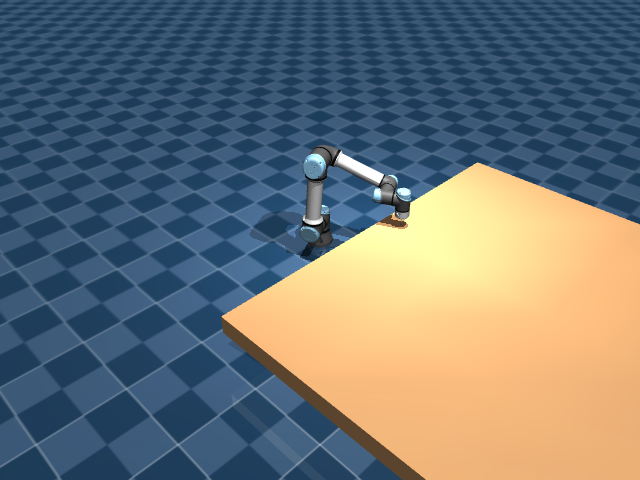

In [8]:
# Use the inverse kinematics to make a start pose for the robot
sol = ur5e.invkin(ctr[0])
print(sol.q)
# visualize the position
ur5e.d.qpos[:] = sol.q
mujoco.mj_forward(ur5e.m, ur5e.d)
renderer.update_scene(ur5e.d, camera="fixed", scene_option=dict())
# show image
media.show_image(renderer.render())
# joints pose
#[ 0.46362935 -1.63647675 -1.8596509  -1.2162613   1.57079635  2.03442568] # CBF

# Controller

In [9]:
import numpy as np
import mujoco
from tqdm import tqdm

# Define Impedance Control Matrices
STIFFNESS = np.array([5000, 5000, 5000, 250, 250, 250])  # Stiffness matrix - 5550
DAMPING_RATIO = 1  # Critical damping
DAMPING = 2 * DAMPING_RATIO * np.sqrt(STIFFNESS)
#MAX_TORQUE = np.array([150.0, 150.0, 150.0, 28.0, 28.0, 28.0])

# Compliance parameters
compliance_vector = np.array([1, 1, 1, 1, 1, 1])

# Initialize error terms
x_e = np.zeros(6)  # Position error
v_e = np.zeros(6)  # Velocity error

duration = 5  # seconds
framerate = 30  # Hz
stepsize = ur5e.m.opt.timestep
n_steps = int(np.ceil(duration / stepsize))
showVideo = True

# Logging and video capture
contact_points = []
contact_forces = []
frames = []
positions_as_quat = np.zeros((n_steps, 7))
positions_as_rpy = np.zeros((n_steps, 6))
velocities = np.zeros((n_steps, 6))
forces = np.zeros((n_steps, 6))  # Ensure forces match 6D wrench
torques = np.zeros((n_steps, 6))
target_positions_as_quat = np.zeros((n_steps, 7))
target_positions = np.zeros((n_steps, 6))
target_velocities = np.zeros((n_steps, 6))
contact_points = []
contact_forces = []
p_contacts_log = np.zeros((n_steps, 4))
time_log = []
force_log = []  # to store the first 3 components of the external force

# Reset MuJoCo Simulation
mujoco.mj_resetData(ur5e.m, ur5e.d)
ur5e.d.qpos[:] = sol.q
mujoco.mj_forward(ur5e.m, ur5e.d)

progress_bar = tqdm(total=duration)
idx = 0

while ur5e.d.time < duration and idx < n_steps:
    progress_bar.update(stepsize)
    
    # Get Cartesian position and Jacobian
    tcp_pos = ur5e.fkine(ur5e.d.qpos)
    J = ur5e.jacob0(ur5e.d.qpos)
    # DLS
    if(np.abs(np.linalg.det(J)) <= 0.001):
        print("Singular configuration ", ur5e.d.time, np.linalg.det(J))
        break
    # Get force at the end effector
    f_ext = np.zeros(6)
    contact_points, contact_forces, _, _, _ = ur5e.get_contact_info()
    if len(contact_forces):
        f_ext[:3] = contact_forces[0]
    '''
    p_contacts, f_contacts, geom1s, geom2s, p_distance= ur5e.get_contact_info()

    for (p_contact, f_contact, geom1, geom2) in zip(p_contacts, f_contacts, geom1s, geom2s):
        for p in p_contacts:  # Store all contact points
            contact_points.append(list(p))

        contact_forces.append(list(f_contact))
    #p_contacts, f_contacts, geom1s, geom2s, p_distance = ur5e.get_contact_info()
    #for (p_contact, f_contact, geom1, geom2) in zip(p_contacts, f_contacts, geom1s, geom2s):
    #    contact_points.append(list(p_contact))  # Store X, Y, Z
    #    contact_forces.append(np.linalg.norm(f_contact))  # Store magnitude of force
    '''

    # Compute trajectory error
    target_pose = tcp_pos 
    x_diff = [0.1 * (1 - np.cos(n_steps*0.01)), 0, 0.05 * (1 - np.cos(n_steps*0.01)), 0, 0, 0]
    target_pose = tcp_pos * sm.SE3.Trans(x_diff[0], x_diff[1], x_diff[2])
    error_in_base_frame = np.concatenate((target_pose.t - tcp_pos.t, np.zeros(3)))  # Ensure 6D error

    # How it is done in URscript version (convert current pose into TCP frame, uses tcp_pos from fkin)
    error_SE3 = tcp_pos.inv() * target_pose  # Compute error in TCP frame
    error_translation = error_SE3.A[:3, 3]  # XYZ
    error_rotation = sm.SO3(error_SE3.R).rpy(order="xyz")  # Roll-pitch-yaw
    error_in_TCP_frame = np.concatenate((error_translation, error_rotation))  # Convert to NumPy
    #print("error TCP frame" ,error_in_TCP_frame)
    #print("error base frame2" ,error_in_base_frame)
    v_e = J @ ur5e.d.qvel
    
    # Compute impedance force
    wrench = STIFFNESS * error_in_base_frame - DAMPING * v_e #- f_ext
    
    # Compute joint forces
    tau = J.T @ wrench
    mass_matrix = np.zeros((6, 6))  
    mujoco.mj_fullM(ur5e.m, mass_matrix, ur5e.d.qM)
    coriolis_forces = ur5e.d.qfrc_bias.copy()  # ??
    tau += mass_matrix @ ur5e.d.qacc + coriolis_forces
    
    # Clamp torques
    #tau = np.clip(tau, -MAX_TORQUE, MAX_TORQUE)
    
    ##########################################################################################
    ##### Meget computationally heavy, kun gør hvis man har brug for x, v og a plots #########
    ##########################################################################################
    # get translational part of T_pen_array
    #p = np.zeros((len(ctr), 2))
    #for i in range(len(ctr)):
    #    p[i] = ctr[i].t[0:2]
    #p = np.hstack((p, np.zeros((len(ctr), 1)), np.ones((len(ctr), 1)), np.zeros((len(ctr), 1))))
    #dp = np.gradient(p, axis=0)
    #ddp = np.gradient(dp, axis=0)

    # Apply torque control
    ur5e.d.ctrl[:] = tau
    
    # Log data
    quat_e = r2q(tcp_pos.R)
    positions_as_quat[idx] = np.concatenate((tcp_pos.t, quat_e))
    positions_as_rpy[idx] = np.concatenate([tcp_pos.t, tcp_pos.rpy(order='xyz')])
    velocities[idx] = v_e
    forces[idx] = wrench  # Ensure correct shape
    torques[idx] = tau
    target_positions_as_quat[idx] = positions_as_quat[idx]
    target_positions[idx] = positions_as_rpy[idx]
    target_velocities[idx] = velocities[idx]
    time_log.append(ur5e.d.time)
    force_log.append(f_ext[:3])
    
    # Capture video frames
    if len(frames) < ur5e.d.time * framerate:
        renderer.update_scene(ur5e.d, camera="fixed4", scene_option=dict())
        pixels = renderer.render()
        frames.append(pixels)
    
    # Step simulation
    mujoco.mj_step(ur5e.m, ur5e.d)
    idx += 1

progress_bar.close()

# Show video
if showVideo:
    media.show_video(frames, fps=framerate)
#print(forces)

  0%|          | 0/5 [00:00<?, ?it/s]

100%|█████████▉| 4.999999999999671/5 [00:03<00:00,  1.52it/s]  


RuntimeError: Error writing '/tmp/tmp8zfrwm6e/file.mp4': [rawvideo @ 0x60d3b3f1c280] Invalid buffer size, packet size 65536 < expected frame_size 921600
Error while decoding stream #0:0: Invalid argument


ValueError: x and y must have same first dimension, but have shapes (85,) and (2500,)

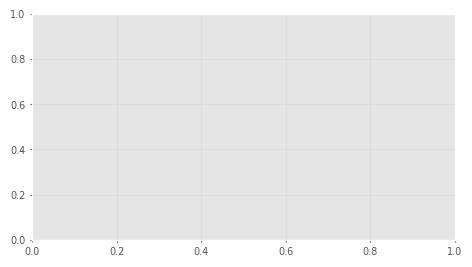

In [ ]:
time = np.array(time_log)
n_joints = 6

plt.figure(figsize=(12, 10))
for i in range(n_joints):
    plt.subplot(3, 2, i+1)
    
    # Plot the nominal and safe joint velocities
    plt.plot(time, torques[:, i], 'r--', label='Nominal Joint Torque')
    
    plt.xlabel('Time (s)')
    plt.ylabel(f'Joint {i+1} Torque')
    plt.legend()
    plt.title(f'Joint {i+1} Torque Comparison')
#MAX_TORQUE = np.array([0.7, 15.0, 17.0, 5.0, 1.0, 1.0])
#MIN_TORQUE = np.array([-0.5, -1.0, -2.0, -1.0, -1.0, -1.0])
plt.tight_layout()
plt.show()

# Impedance with CBF constraining joint torques, barrier func h does not work properly

In [ ]:
import numpy as np
import mujoco
from tqdm import tqdm
from cvxopt import matrix, solvers
import matplotlib.pyplot as plt

solvers.options['show_progress'] = False

# cartesian impedance
STIFFNESS = np.array([5000, 5000, 5000, 1000, 1000, 1000])
DAMPING_RATIO = 1  # Critical damping
DAMPING = 2 * DAMPING_RATIO * np.sqrt(STIFFNESS)

M_diag = np.array([50.0, 50.0, 50.0, 50.0, 50.0, 50.0])
D_diag = np.array([50, 50, 50, 10, 10, 10])
K_diag = np.array([50, 50, 50, 10, 10, 10])
M_cart = np.diag(M_diag)
D_cart = np.diag(D_diag)
K_cart = np.diag(K_diag)

#MAX_TORQUE = np.array([0.8, 16.0, 16.0, 2.0, 0.3, 0.2])
#MIN_TORQUE = np.array([-0.5, 1.0, 12.5, 0.3, -0.2, -0.2])
MAX_TORQUE = np.array([1.0, 17.0, 16.0, 2.5, 0.3, 0.2])
MIN_TORQUE = np.array([-0.7, -1.0, -1.0, -0.1, -0.3, -0.2])

x_e = np.zeros(6)  # Cartesian position error
v_e = np.zeros(6)  # Cartesian velocity error
compliance_vector = np.array([1, 1, 1, 1, 1, 1])

alpha = 10  # scaling factor for the barrier margin (adjust as needed)
gamma = 1.0  # additional offset

# --- Simulation settings ---
duration = 5         # seconds
framerate = 30       # Hz
stepsize = ur5e.m.opt.timestep  # simulation timestep
n_steps = int(np.ceil(duration / stepsize))
showVideo = True

# --- Logging arrays ---
time_log           = []
nominal_torque_log = np.zeros((n_steps, 6))
safe_torque_log    = np.zeros((n_steps, 6))
barrier_log        = np.zeros((n_steps, 6))
frames = []  # for video capture
tau_cbf_log = np.zeros((n_steps, 6))

# --- Reset simulation ---
mujoco.mj_resetData(ur5e.m, ur5e.d)
ur5e.d.qpos[:] = sol.q  # assume 'sol.q' holds a valid initial configuration
mujoco.mj_forward(ur5e.m, ur5e.d)

progress_bar = tqdm(total=duration)
idx = 0


while ur5e.d.time < duration and idx < n_steps:
    progress_bar.update(stepsize)
    
    tcp_pos = ur5e.fkine(ur5e.d.qpos)
    J = ur5e.jacob0(ur5e.d.qpos)
    
    f_ext = np.zeros(6)
    contact_points, contact_forces, _, _, _ = ur5e.get_contact_info()
    if len(contact_forces):
        f_ext[:3] = contact_forces[0]
    f_ext *= compliance_vector 
    
    t = ur5e.d.time
    x_diff = 0.1 * (1 - np.cos(n_steps * 0.01))
    z_diff = 0.05 * (1 - np.cos(n_steps * 0.01))
    T_offset = sm.SE3.Trans(x_diff, 0, z_diff)  # using an SE3 transform 
    target_pose = tcp_pos * T_offset
    # Error expressed in the base frame: position error and zero orientation error
    error_in_base_frame = np.concatenate((target_pose.t - tcp_pos.t, np.zeros(3)))
    
    # M*ẍ + D*ẋ + K*x = f_ext   →   ẍ = M⁻¹ (f_ext - K*x_e - D*v_e)
    acc_e = np.linalg.inv(M_cart) @ (f_ext - K_cart @ x_e - D_cart @ v_e)
    v_e = v_e + stepsize * 0.5 * acc_e
    x_e = x_e + stepsize * 0.5 * v_e
    
    # impedance control
    wrench = STIFFNESS * error_in_base_frame - DAMPING * (J @ ur5e.d.qvel)
    # Map to joint torques
    tau_nom = J.T @ wrench
    mass_matrix = np.zeros((6, 6))
    mujoco.mj_fullM(ur5e.m, mass_matrix, ur5e.d.qM)
    coriolis_forces = ur5e.d.qfrc_bias.copy()
    tau_nom += mass_matrix @ ur5e.d.qacc + coriolis_forces
    nominal_torque_log[idx, :] = tau_nom.copy()
    n = tau_nom.shape[0]
    '''
    # The objective: minimize 0.5 * ||tau_safe - tau_nom||^2
    # In QP standard form: (1/2) x^T P x + q^T x, so we set:
    P = matrix(np.eye(6))            # (2*I works equally well as I up to scaling)
    q = matrix(-tau_nom)            # (scaling cancels out)
    G = matrix(np.vstack((np.eye(6), -np.eye(6))))
    # Hard box constraints:
    #A1 = np.eye(n)               # tau_safe <= MAX_TORQUE
    #b1 = MAX_TORQUE
    #A2 = -np.eye(n)              # -tau_safe <= -MIN_TORQUE  i.e. tau_safe >= MIN_TORQUE
    #b2 = -MIN_TORQUE
    
    # Barrier (CBF) constraints (discrete approximation):
    # Lower barrier: tau_safe >= tau_nom - α*(tau_nom - MIN_TORQUE) + γ
    #   → -tau_safe <= -[tau_nom - α*(tau_nom - MIN_TORQUE) + γ]
    #A3 = -np.eye(n)
    #b3 = -(tau_nom - alpha*(tau_nom - MIN_TORQUE) + gamma)
    # Upper barrier: tau_safe <= tau_nom + α*(MAX_TORQUE - tau_nom) - γ
    #A4 = np.eye(n)
    #b4 = tau_nom + alpha*(MAX_TORQUE - tau_nom) - gamma

    # Stack all constraints:
    #G = np.vstack((A1, A2, A3, A4))
    #h_vec = np.hstack((b1, b2, b3, b4))
    #q_vec = matrix(-tau_nom)
    h_vec = matrix(np.hstack((MAX_TORQUE, -MIN_TORQUE)))
    # Convert to cvxopt matrices:
    P_cvx = matrix(P)
    q_cvx = matrix(q)
    G_cvx = matrix(G)
    h_cvx = matrix(h_vec)
    
    sol_qp = solvers.qp(P, q, G, h_vec)
    tau_safe = np.array(sol_qp['x']).flatten()
    tau_cbf_log[idx, :] = tau_safe.copy()

    h_barrier = np.minimum(tau_safe - MIN_TORQUE, MAX_TORQUE - tau_safe)
    safe_torque_log[idx, :] = tau_safe.copy()
    barrier_log[idx, :] = h_barrier.copy()
    
    ur5e.d.ctrl[:] = tau_safe
    '''
    u0 = tau.copy()  # Original torque from admittance/impedance control

    # --- Barrier Function ---
    h = gamma - np.linalg.norm(error_in_base_frame[:6])  # h(x)
    Lf_h = -error_in_base_frame[:6].T @ v_e / (np.linalg.norm(error_in_base_frame[:6]) + 1e-6)  # L_f h(x)

    # --- Control effectiveness ---
    e_dir = error_in_base_frame[:6] / (np.linalg.norm(error_in_base_frame[:6]) + 1e-6)  # ∇h/||∇h||
    Lg_h = J.T @ e_dir  # L_g h ∈ ℝ^{6} (maps torque to dh/dt)

    # --- Class-K function α(h) ---
    alpha_h = gamma * h

    # ---- Analytical closed-form CBF correction ----

    # Step 1: Clip nominal control u₀ into box constraints (τ limits)
    u_star = np.clip(u0, MIN_TORQUE, MAX_TORQUE)

    # Step 2: Check if CBF constraint is satisfied
    cbf_value = Lf_h + Lg_h @ u_star + alpha_h  # CBF condition
    if cbf_value < 0:
        # Step 3: Closed-form CBF projection
        numerator = -cbf_value
        denominator = Lg_h @ Lg_h + 1e-6  # Avoid divide by zero
        lambda_cbf = numerator / denominator
        u_star = u_star + lambda_cbf * Lg_h
        # Step 4: Optional re-clip after projection
        u_star = np.clip(u_star, MIN_TORQUE, MAX_TORQUE)

    # --- Apply safe torque u* ---
    tau_safe = u_star.copy()
    tau_cbf_log[idx, :] = tau_safe.copy()
    ur5e.d.ctrl[:] = tau_safe
    if len(frames) < ur5e.d.time * framerate:
        renderer.update_scene(ur5e.d, camera="fixed4", scene_option=dict())
        pixels = renderer.render()
        frames.append(pixels)

    mujoco.mj_step(ur5e.m, ur5e.d)
    time_log.append(t)
    idx += 1

progress_bar.close()

# Optionally, display the recorded video.
if showVideo and len(frames) > 0:
    media.show_video(frames, fps=framerate)


100%|█████████▉| 4.999999999999671/5 [00:05<00:00,  1.04s/it]  


# Working better

In [ ]:
import numpy as np
import mujoco
from tqdm import tqdm
from cvxopt import matrix, solvers
import matplotlib.pyplot as plt

# ----------------------------------------------------------------
# CVXOPT settings: Disable solver output for cleaner logs.
solvers.options['show_progress'] = False

# ----------------------------------------------------------------
# Impedance controller parameters
STIFFNESS = np.array([5000, 5000, 5000, 250, 250, 250])
DAMPING_RATIO = 1  # Critical damping
DAMPING = 2 * DAMPING_RATIO * np.sqrt(STIFFNESS)
MAX_TORQUE = np.array([2.0, 15.0, 15.0, 3.0, 2.0, 2.0])
MIN_TORQUE = -MAX_TORQUE  # Explicit minimum torque constraint
#MAX_TORQUE = np.array([0.8, 16.0, 16.0, 2.0, 0.3, 0.2])
#MIN_TORQUE = np.array([-0.5, 1.0, 12.5, 0.3, -0.2, -0.2])

# (Optional) compliance vector if needed
compliance_vector = np.array([1, 1, 1, 1, 1, 1])

# Simulation parameters
duration = 5         # seconds
framerate = 30       # Hz
stepsize = ur5e.m.opt.timestep  # assume defined in your simulation object
n_steps = int(np.ceil(duration / stepsize))
showVideo = True

# ----------------------------------------------------------------
# Logging arrays (6 joints)
time_log           = []
nominal_torque_log = np.zeros((n_steps, 6))
safe_torque_log    = np.zeros((n_steps, 6))
barrier_log        = np.zeros((n_steps, 6))  # per-joint margin

# (Other logging such as positions, video frames, etc. can be added as needed)
frames = []  # for video capture, if desired

# ----------------------------------------------------------------
# Reset the simulation (assuming ur5e and sol are defined in your context)
mujoco.mj_resetData(ur5e.m, ur5e.d)
ur5e.d.qpos[:] = sol.q
mujoco.mj_forward(ur5e.m, ur5e.d)

progress_bar = tqdm(total=duration)
idx = 0

def torque_cbf_projection(tau_des, MAX_TORQUE, MIN_TORQUE):
    """
    project the desired torque tau_des onto the safe set
    defined by the joint torque limits:
    
        MIN_TORQUE <= tau_safe <= MAX_TORQUE.
    
    The QP:
    
        minimize   (1/2)||tau_safe - tau_des||^2
        subject to tau_safe <= MAX_TORQUE and -tau_safe <= -MIN_TORQUE.
        
    In standard QP form, the objective expands to:
        1/2 * tau_safe^T * tau_safe - tau_des^T * tau_safe  + constant.
    """
    n = tau_des.shape[0]
    P = 2 * np.eye(n)
    q = -2 * tau_des

    # Box constraints: tau_safe <= MAX_TORQUE and -tau_safe <= -MIN_TORQUE,
    G = np.vstack(( np.eye(n), -np.eye(n) ))
    h = np.hstack(( MAX_TORQUE, -MIN_TORQUE ))

    #cvxopt matrices
    P_cvx = matrix(P)
    q_cvx = matrix(q)
    G_cvx = matrix(G)
    h_cvx = matrix(h)

    sol = solvers.qp(P_cvx, q_cvx, G_cvx, h_cvx)
    tau_safe = np.array(sol['x']).flatten()
    return tau_safe

# ----------------------------------------------------------------
# Main simulation loop
while ur5e.d.time < duration and idx < n_steps:
    progress_bar.update(stepsize)
    
    # Get current end-effector pose and Jacobian
    tcp_pos = ur5e.fkine(ur5e.d.qpos)
    J = ur5e.jacob0(ur5e.d.qpos)
    
    # Compute the Jacobian from the current joint positions (redundant call removed if desired)
    # J = ur5e.jacob0(ur5e.d.qpos)

    # damping factor for DLS
    lambda_damp = 0.01

    # Check the conditioning of J (using its determinant as a crude measure)
    if np.abs(np.linalg.det(J)) <= 0.001:
        # Compute the damped pseudo-inverse using DLS:
        J_inv = J.T @ np.linalg.inv(J @ J.T + lambda_damp**2 * np.eye(J.shape[0]))
        print("Using damped least squares inversion at time", ur5e.d.time)
    else:
        J_inv = np.linalg.pinv(J)

    f_ext = np.zeros(6)
    contact_points, contact_forces, _, _, _ = ur5e.get_contact_info()
    if len(contact_forces):
        f_ext[:3] = contact_forces[0]

    # ----------------------------------------------------------------
    # Define a desired trajectory.
    t = ur5e.d.time
    #x_offset = 0.1 * (1 - np.cos(t))
    #z_offset = 0.05 * (1 - np.cos(t))
    # Assume that sm.SE3.Trans creates a translation transform.
    #target_pose = tcp_pos * sm.SE3.Trans(x_offset, 0, z_offset)
    # Compute trajectory error
    target_pose = tcp_pos 
    trajectory_amplitude = 0.04
    trajectory_frequency = 0.1
    #x_diff = [trajectory_amplitude * np.sin(2 * np.pi * trajectory_frequency * n_steps)]
    x_diff = [0.1 * (1 - np.cos(n_steps*0.01)), 0, 0.05 * (1 - np.cos(n_steps*0.01)), 0, 0, 0]
    target_pose = tcp_pos * sm.SE3.Trans(x_diff[0], x_diff[1], x_diff[2])
    error_in_base_frame = np.concatenate((target_pose.t - tcp_pos.t, np.zeros(3)))  # Ensure 6D error
    
    # Compute error in base frame (only translation error is considered here)
    #error_translation = target_pose.t - tcp_pos.t
    #error_in_base_frame = np.concatenate((error_translation, np.zeros(3)))
    
    # Cartesian velocity error computed from joint velocities
    v_e = J @ ur5e.d.qvel
    
    # ----------------------------------------------------------------
    # Compute impedance wrench and nominal joint torques.
    wrench = STIFFNESS * error_in_base_frame - DAMPING * v_e
    tau_nominal = J.T @ wrench

    # Optionally add dynamics compensation:
    mass_matrix = np.zeros((6, 6))
    mujoco.mj_fullM(ur5e.m, mass_matrix, ur5e.d.qM)
    coriolis_forces = ur5e.d.qfrc_bias.copy()
    tau_nominal += mass_matrix @ ur5e.d.qacc + coriolis_forces

    # ----------------------------------------------------------------
    # Apply CVXOPT-based CBF to get safe torques.
    tau_safe = torque_cbf_projection(tau_nominal, MAX_TORQUE, MIN_TORQUE)
    
    # Compute the barrier function value per joint.
    barrier = MAX_TORQUE - np.abs(tau_nominal)
    
    # ----------------------------------------------------------------
    # Log the data
    time_log.append(t)
    nominal_torque_log[idx] = tau_nominal
    safe_torque_log[idx] = tau_safe
    barrier_log[idx] = barrier

    # Apply the safe torque command to the simulation.
    ur5e.d.ctrl[:] = tau_safe

    # (Optional) Capture video frame if desired.
    if len(frames) < ur5e.d.time * framerate:
        renderer.update_scene(ur5e.d, camera="fixed4", scene_option=dict())
        pixels = renderer.render()
        frames.append(pixels)

    # Step simulation and increment counter.
    mujoco.mj_step(ur5e.m, ur5e.d)
    idx += 1

progress_bar.close()

plt.tight_layout()
plt.show()

# ----------------------------------------------------------------
# Optionally, show the recorded video
if showVideo:
    media.show_video(frames, fps=framerate)

100%|█████████▉| 4.999999999999671/5 [00:05<00:00,  1.20s/it]  


<Figure size 640x480 with 0 Axes>

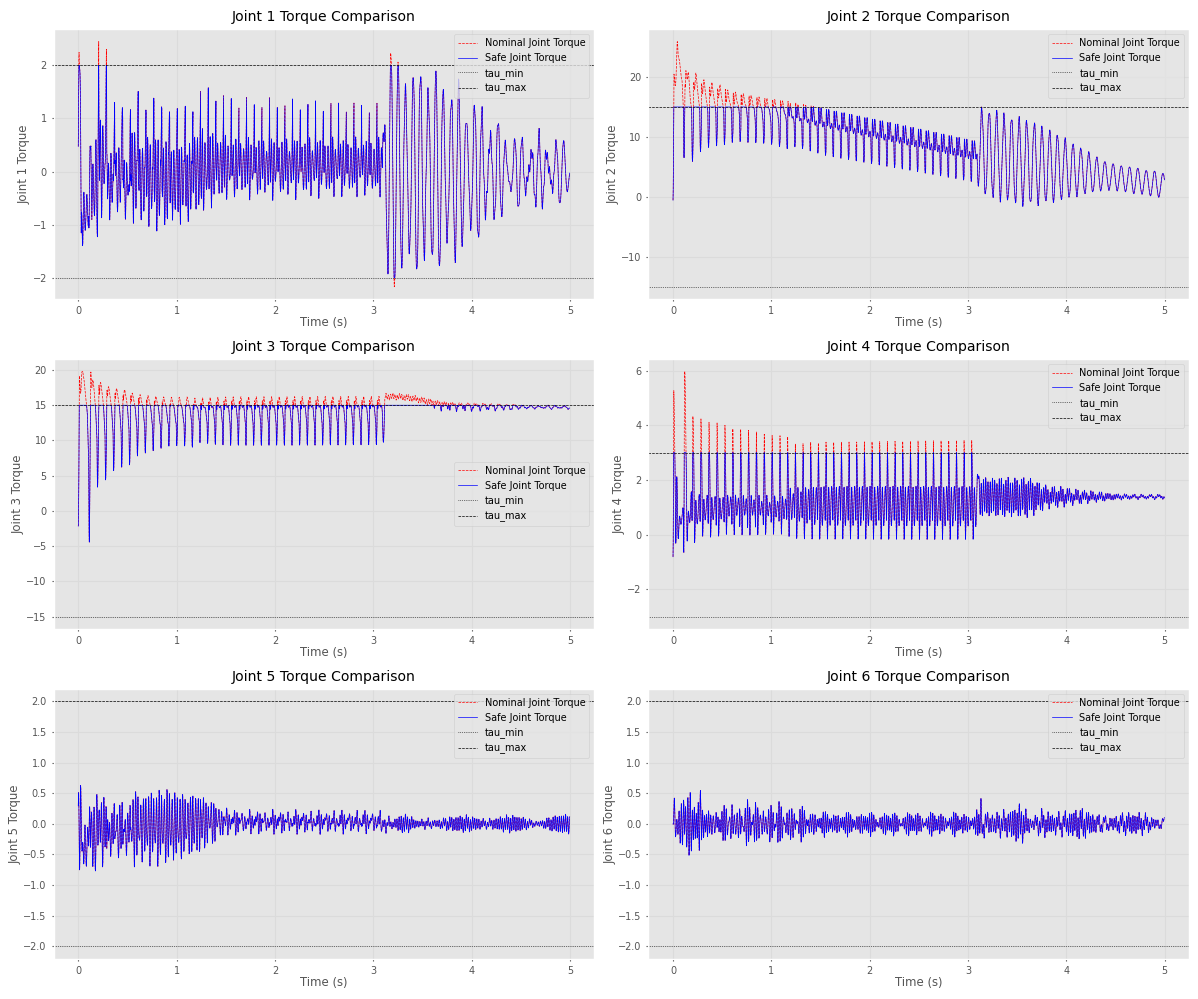

In [ ]:
time = np.array(time_log)
n_joints = 6

plt.figure(figsize=(12, 10))
for i in range(n_joints):
    plt.subplot(3, 2, i+1)
    
    # Plot the nominal and safe joint velocities
    plt.plot(time, nominal_torque_log[:, i], 'r--', label='Nominal Joint Torque')
    plt.plot(time, safe_torque_log[:, i], 'b-', label='Safe Joint Torque')
    
    # Plot horizontal lines for vel_min and vel_max
    plt.axhline(MIN_TORQUE[i], color='k', linestyle=':', label='tau_min')
    plt.axhline(MAX_TORQUE[i], color='k', linestyle='--', label='tau_max')
    
    plt.xlabel('Time (s)')
    plt.ylabel(f'Joint {i+1} Torque')
    plt.legend()
    plt.title(f'Joint {i+1} Torque Comparison')
#MAX_TORQUE = np.array([0.8, 16.0, 16.0, 2.0, 0.3, 0.2])
#MIN_TORQUE = np.array([-0.5, 1.0, 12.5.0, 0.3, -0.2, -0.2])
plt.tight_layout()
plt.show()

# Energy tank

In [31]:
import numpy as np
import mujoco
from tqdm import tqdm
from cvxopt import matrix, solvers
import matplotlib.pyplot as plt

from cvxopt import matrix, solvers

from cvxopt import matrix, solvers
import numpy as np

class EnergyTankCBF:
    def __init__(self, kf=10.0, p1=5.0, p2=3.0, Pmax=30.0, Emin=0.5, E0=5.0, Emax = 100.0):
        self.kf = kf # Tank gain (higher = faster response but constraints are harder to satisfy. Low = slower response + lag)
        self.p1 = p1 # Power constraint steepness (B1) high makes constraint tighter and conservative, low relaxes enforcement
        self.p2 = p2 # Enforce tank energy (B2) high prioritizes keeping energy above Emin, low permits closer to Emin
        self.Pmax = Pmax # Max allowed power draw
        self.Emin = Emin # Min energy level
        self.E = E0  # Initial energy in the tank
        self.Emax = Emax

    def solve(self, Pd, dt):
        alpha_prev = 0.0
        Pd_bar = -Pd
        Pmax_bar = -self.Pmax
        s = self.E
        
        # Setup QP
        P = matrix(np.array([[2.0]]))
        q = matrix(np.array([-2.0 * Pd_bar]))

        # Use a temporary guess of s_dot = -u ≈ -Pd_bar (just for constraints)
        s_dot_guess = -Pd_bar
        s_dot_guess = np.clip(s_dot_guess, -self.Pmax * 2, self.Pmax * 2)

        # Compute constraints
        epsilon = 1e-6
        h = matrix(np.array([
            -self.p1 * (s_dot_guess - Pmax_bar) + self.kf * s_dot_guess + epsilon,
            -(-2 * self.p2 + self.kf) * s_dot_guess + self.p2**2 * (s - self.Emin) + epsilon
        ]))

        G = matrix(np.array([
            [-self.kf],
            [-self.kf]
        ]))

        try:
            sol = solvers.qp(P, q, G, h)
            u = float(sol['x'][0])
        except:
            print(f"⚠️ QP failed — setting u = 0 | Pd: {Pd:.4f}, s: {s:.4f}")
            u = 0.0

        # Update tank energy based on actual u
        if Pd < 0: # Not sure about
            self.E += -Pd * dt
        #self.E = max(self.E, 0.0)
        delta_E = u * dt
        if self.E - delta_E < self.Emin:
            delta_E = self.E - self.Emin  # don't go below Emin
            u = delta_E / dt  # adjust u accordingly

        self.E -= delta_E

        # Compute alpha
        alpha = -u / Pd if abs(Pd) > 1e-6 else 0.0
        #alpha = 0.9 * alpha_prev + 0.1 * alpha
        alpha = np.clip(alpha, 0.0, 1.0)
        alpha_prev = alpha
        return alpha, u, self.E



# ----------------------------------------------------------------
# CVXOPT settings: Disable solver output for cleaner logs.
solvers.options['show_progress'] = False

# ----------------------------------------------------------------
# Impedance controller parameters
STIFFNESS = np.array([5000, 5000, 5000, 250, 250, 250])
DAMPING_RATIO = 1  # Critical damping
DAMPING = 2 * DAMPING_RATIO * np.sqrt(STIFFNESS)
MAX_TORQUE = np.array([2.0, 15.0, 15.0, 3.0, 2.0, 2.0])
MIN_TORQUE = -MAX_TORQUE  # Explicit minimum torque constraint
#MAX_TORQUE = np.array([0.8, 16.0, 16.0, 2.0, 0.3, 0.2])
#MIN_TORQUE = np.array([-0.5, 1.0, 12.5, 0.3, -0.2, -0.2])

# (Optional) compliance vector if needed
compliance_vector = np.array([1, 1, 1, 1, 1, 1])

# Simulation parameters
duration = 5         # seconds
framerate = 30       # Hz
stepsize = ur5e.m.opt.timestep  # assume defined in your simulation object
n_steps = int(np.ceil(duration / stepsize))
showVideo = True

# ----------------------------------------------------------------
# Logging arrays (6 joints)
time_log           = []
nominal_torque_log = np.zeros((n_steps, 6))
safe_torque_log    = np.zeros((n_steps, 6))
barrier_log        = np.zeros((n_steps, 6))  
fd_log = np.zeros((n_steps, 6))
energy_log         = np.zeros(n_steps)
alpha_log          = np.zeros(n_steps)
Ea_ns_log = np.zeros(n_steps)       # virtual tank energy if no scaling
Pa_ns_log = np.zeros(n_steps)       # power with no scaling (full control)
Pa_ws_log = np.zeros(n_steps)       # power with scaling (actual)
s_dot_log = np.zeros(n_steps)       # energy rate


# (Other logging such as positions, video frames, etc. can be added as needed)
frames = []  # for video capture, if desired

# ----------------------------------------------------------------
# Reset the simulation (assuming ur5e and sol are defined in your context)
mujoco.mj_resetData(ur5e.m, ur5e.d)
ur5e.d.qpos[:] = sol.q
mujoco.mj_forward(ur5e.m, ur5e.d)

progress_bar = tqdm(total=duration)
idx = 0
#tank = EnergyTankCBF(kf=50.0, p1=2.0, p2=1.0, Pmax=15.0, Emin=90.0, E0=100.0)



def torque_cbf_projection(tau_des, MAX_TORQUE, MIN_TORQUE):
    """
    Uses CVXOPT to project the desired torque tau_des onto the safe set
    defined by the joint torque limits:
    
        MIN_TORQUE <= tau_safe <= MAX_TORQUE.
    
    The QP is formulated as:
    
        minimize   (1/2)||tau_safe - tau_des||^2
        subject to tau_safe <= MAX_TORQUE and -tau_safe <= -MIN_TORQUE.
        
    In standard QP form, the objective expands as:
        1/2 * tau_safe^T * tau_safe - tau_des^T * tau_safe  + constant.
    """
    n = tau_des.shape[0]
    P = 2 * np.eye(n)
    q = -2 * tau_des

    # Box constraints: tau_safe <= MAX_TORQUE and -tau_safe <= -MIN_TORQUE,
    # which is equivalent to: MIN_TORQUE <= tau_safe <= MAX_TORQUE.
    G = np.vstack(( np.eye(n), -np.eye(n) ))
    h = np.hstack(( MAX_TORQUE, -MIN_TORQUE ))

    # Convert to cvxopt matrices
    P_cvx = matrix(P)
    q_cvx = matrix(q)
    G_cvx = matrix(G)
    h_cvx = matrix(h)

    sol = solvers.qp(P_cvx, q_cvx, G_cvx, h_cvx)
    tau_safe = np.array(sol['x']).flatten()

    return tau_safe
MAX_TORQUE_SOFT = np.array([25, 25, 25, 5, 5, 5])
tank = EnergyTankCBF(kf=50.0, p1=2.0, p2=1.0, Pmax=15.0, Emin=90.0, E0=100.0, Emax=100.0)

# Adaptive impedance constants
kc0 = 5000      # Nominal stiffness (used when energy is low)
#Emax = 100.0    # Max allowable energy before scaling stiffness
mass_eff = 3.0  # Effective mass estimate of the end-effector
kc_log = np.zeros(n_steps)
mass_matrix = np.zeros((6, 6))
# Main simulation loop
while ur5e.d.time < duration and idx < n_steps:
    progress_bar.update(stepsize)

    tcp_pos = ur5e.fkine(ur5e.d.qpos)
    J = ur5e.jacob0(ur5e.d.qpos)

    lambda_damp = 0.01
    if np.abs(np.linalg.det(J)) <= 0.001:
        J_inv = J.T @ np.linalg.inv(J @ J.T + lambda_damp**2 * np.eye(J.shape[0]))
    else:
        J_inv = np.linalg.pinv(J)

    f_ext = np.zeros(6)
    contact_points, contact_forces, _, _, _ = ur5e.get_contact_info()
    if len(contact_forces):
        f_ext[:3] = contact_forces[0]

    t = ur5e.d.time
    x_diff = [0.1 * (1 - np.cos(n_steps*0.01)), 0, 0.05 * (1 - np.cos(n_steps*0.01)), 0, 0, 0]
    target_pose = tcp_pos * sm.SE3.Trans(x_diff[0], x_diff[1], x_diff[2])
    error_in_base_frame = np.concatenate((target_pose.t - tcp_pos.t, np.zeros(3)))

    v_e = J @ ur5e.d.qvel

    # === Adaptive stiffness based on tank energy ===
    position_error = error_in_base_frame[:3]
    velocity_error = v_e[:3]
    position_error_norm_sq = np.dot(position_error, position_error)
    velocity_norm_sq = np.dot(velocity_error, velocity_error)
    mujoco.mj_fullM(ur5e.m, mass_matrix, ur5e.d.qM)
    if f_ext.any == 0:#tank.E < tank.Emax or position_error_norm_sq < 1e-6:
        kc = kc0
    else:
        kc = ((2 * tank.Emax - mass_eff * velocity_norm_sq) / position_error_norm_sq) / 100000

    kc_log[idx] = kc

    STIFFNESS_adaptive = np.array([kc]*3 + [kc*0.05]*3)
    DAMPING_adaptive = 2 * np.sqrt(STIFFNESS_adaptive)

    wrench = STIFFNESS_adaptive * error_in_base_frame - DAMPING_adaptive * v_e
    tau_nominal = J.T @ wrench

    
    coriolis_forces = ur5e.d.qfrc_bias.copy()
    tau_nominal += mass_matrix @ ur5e.d.qacc + coriolis_forces

    Pd = float(np.dot(tau_nominal, ur5e.d.qvel))
    alpha, u_opt, energy = tank.solve(Pd, dt=stepsize)
    Pa_ns_log[idx] = Pd
    Pa_ws_log[idx] = alpha * Pd
    s_dot_log[idx] = -u_opt

    if idx == 0:
        Ea_ns_log[idx] = tank.E
    else:
        Ea_ns_log[idx] = Ea_ns_log[idx - 1] - Pd * stepsize

    F_d = wrench
    fd_log[idx] = F_d

    F_a = alpha * F_d
    tau_safe = J.T @ F_a + mass_matrix @ ur5e.d.qacc + coriolis_forces
    tau_safe = np.clip(tau_safe, MIN_TORQUE, MAX_TORQUE)

    energy_log[idx] = tank.E
    alpha_log[idx] = alpha

    time_log.append(t)
    nominal_torque_log[idx] = tau_nominal
    safe_torque_log[idx] = tau_safe
    #barrier_log[idx] = barrier

    ur5e.d.ctrl[:] = tau_safe

    if len(frames) < ur5e.d.time * framerate:
        renderer.update_scene(ur5e.d, camera="fixed4", scene_option=dict())
        pixels = renderer.render()
        frames.append(pixels)

    mujoco.mj_step(ur5e.m, ur5e.d)
    idx += 1


progress_bar.close()

plt.tight_layout()
plt.show()

# ----------------------------------------------------------------
# Optionally, show the recorded video
if showVideo:
    media.show_video(frames, fps=framerate)

100%|█████████▉| 4.999999999999671/5 [00:06<00:00,  1.22s/it]  


<Figure size 640x480 with 0 Axes>

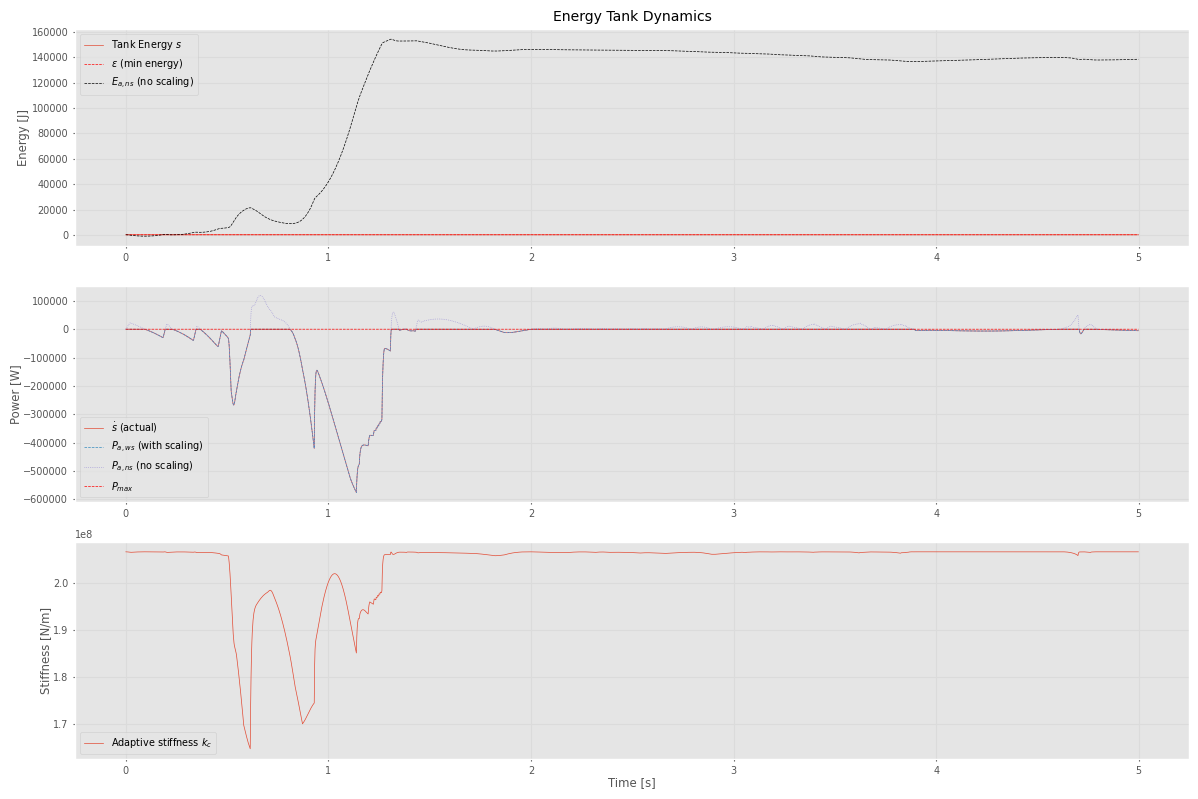

In [32]:
# === Plot logged variables ===
time_log_np = np.array(time_log)

plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(time_log_np, energy_log, label='Tank Energy $s$')
plt.plot(time_log_np, [tank.Emin]*len(time_log_np), 'r--', label='$\epsilon$ (min energy)')
plt.plot(time_log_np, Ea_ns_log, 'k--', label='$E_{a,ns}$ (no scaling)')
plt.ylabel('Energy [J]')
plt.title('Energy Tank Dynamics')
plt.legend()
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(time_log_np, s_dot_log, label='$\dot{s}$ (actual)')
plt.plot(time_log_np, Pa_ws_log, '--', label='$P_{a,ws}$ (with scaling)')
plt.plot(time_log_np, Pa_ns_log, ':', label='$P_{a,ns}$ (no scaling)')
plt.plot(time_log_np, [tank.Pmax]*len(time_log_np), 'r--', label='$P_{max}$')
plt.ylabel('Power [W]')
plt.legend()
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(time_log_np, kc_log, label='Adaptive stiffness $k_c$')
plt.ylabel('Stiffness [N/m]')
plt.xlabel('Time [s]')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

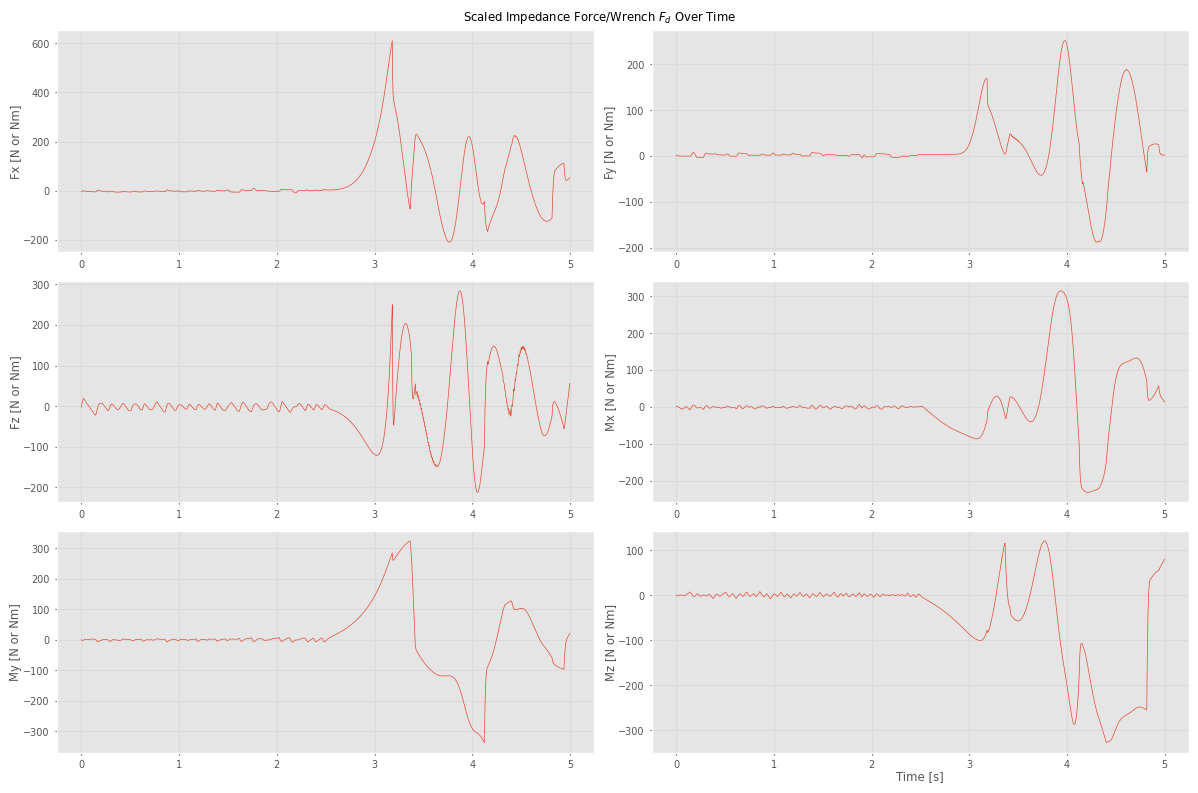

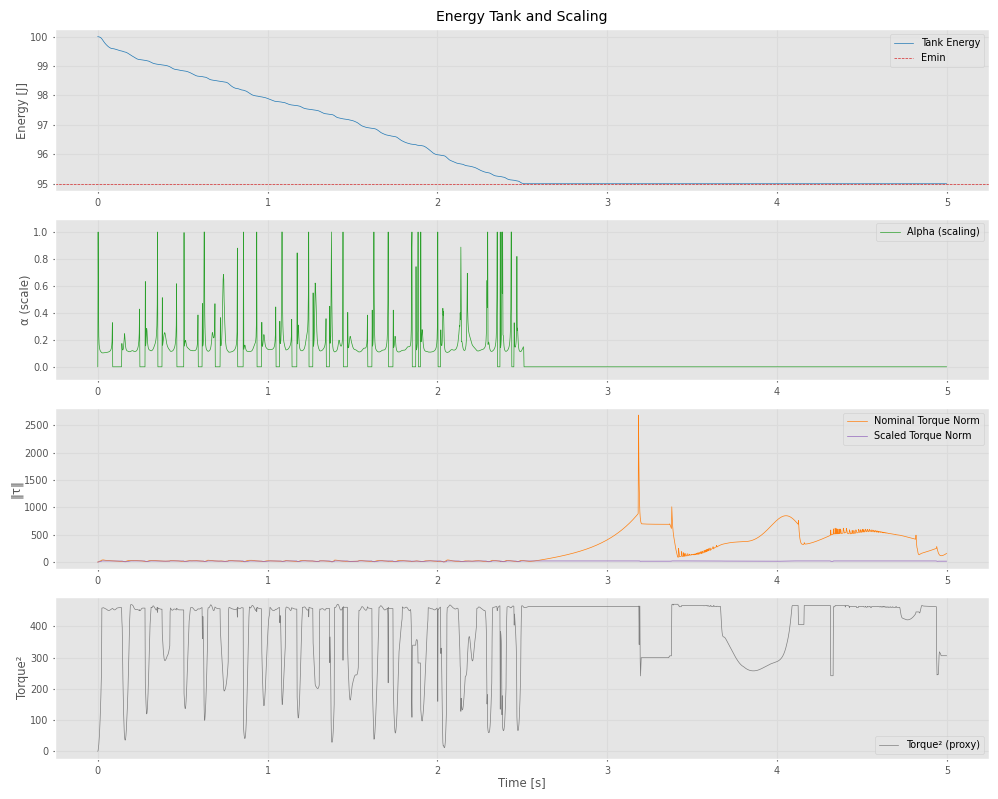

In [ ]:
# Plot energy tank behavior


time_log_np = np.array(time_log)
torque_norm_nominal = np.linalg.norm(nominal_torque_log, axis=1)
torque_norm_safe = np.linalg.norm(safe_torque_log, axis=1)
power_log = np.einsum('ij,ij->i', safe_torque_log, safe_torque_log)  # not true Pd, just energy proxy
plt.figure(figsize=(12, 8))
labels = ['Fx', 'Fy', 'Fz', 'Mx', 'My', 'Mz']

for i in range(6):
    plt.subplot(3, 2, i + 1)
    plt.plot(time_log_np, fd_log[:, i])
    plt.ylabel(f'{labels[i]} [N or Nm]')
    plt.grid(True)

plt.suptitle('Scaled Impedance Force/Wrench $F_d$ Over Time')
plt.xlabel('Time [s]')
plt.tight_layout()
plt.show()
plt.figure(figsize=(10, 8))

plt.subplot(4, 1, 1)
plt.plot(time_log_np, energy_log, label='Tank Energy', color='tab:blue')
plt.axhline(y=tank.Emin, linestyle='--', color='tab:red', label='Emin')
plt.ylabel("Energy [J]")
plt.title("Energy Tank and Scaling")
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(time_log_np, alpha_log, label='Alpha (scaling)', color='tab:green')
plt.ylabel("α (scale)")
plt.ylim([-0.1, 1.1])
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(time_log_np, torque_norm_nominal, label='Nominal Torque Norm', color='tab:orange')
plt.plot(time_log_np, torque_norm_safe, label='Scaled Torque Norm', color='tab:purple')
plt.ylabel("‖τ‖")
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(time_log_np, power_log, label='Torque² (proxy)', color='tab:gray')
plt.ylabel("Torque²")
plt.xlabel("Time [s]")
plt.legend()

plt.tight_layout()
plt.show()


# CBF energy tank (not working yet)

In [ ]:
import numpy as np
import mujoco
from tqdm import tqdm
from cvxopt import matrix, solvers
import matplotlib.pyplot as plt

from cvxopt import matrix, solvers

class EnergyTankCBF:
    def __init__(self, kf=10.0, p1=5.0, p2=3.0, Pmax=50.0, Emin=0.5, E0=5.0):
        self.kf = kf
        self.p1 = p1
        self.p2 = p2
        self.Pmax = Pmax
        self.Emin = Emin
        self.E = E0
        self.s_dot = 0.0  # Initial tank rate

    def solve(self, Pd, dt):
        Pd_bar = -Pd
        Pmax_bar = -self.Pmax
        s = self.E
        s_dot = self.s_dot

        # QP: minimize (u - Pd_bar)^2
        P = matrix(np.array([[2.0]]))
        q = matrix(np.array([-2.0 * Pd_bar]))

        # Constraints:
        G = matrix(np.array([
            [-self.kf],
            [-self.kf]
        ]))

        h = matrix(np.array([
            -self.p1 * (s_dot - Pmax_bar) + self.kf * s_dot,
            -(-2 * self.p2 + self.kf) * s_dot + self.p2**2 * (s - self.Emin)
        ]))

        try:
            sol = solvers.qp(P, q, G, h)
            u = float(sol['x'][0])
        except:
            print("⚠️ QP failed — falling back to u = 0")
            u = 0.0

        # Update tank state
        self.s_dot = self.kf * (Pd_bar - s_dot)
        self.E -= u * dt
        self.E = max(self.E, 0.0)

        # Compute α scaling factor
        alpha = -u / Pd if Pd != 0 else 0.0
        alpha = np.clip(alpha, 0.0, 1.0)

        return alpha, u, self.E


# ----------------------------------------------------------------
# CVXOPT settings: Disable solver output for cleaner logs.
solvers.options['show_progress'] = False

# ----------------------------------------------------------------
# Impedance controller parameters
STIFFNESS = np.array([5000, 5000, 5000, 250, 250, 250])
DAMPING_RATIO = 1  # Critical damping
DAMPING = 2 * DAMPING_RATIO * np.sqrt(STIFFNESS)
MAX_TORQUE = np.array([2.0, 15.0, 15.0, 3.0, 2.0, 2.0])
MIN_TORQUE = -MAX_TORQUE  # Explicit minimum torque constraint
#MAX_TORQUE = np.array([0.8, 16.0, 16.0, 2.0, 0.3, 0.2])
#MIN_TORQUE = np.array([-0.5, 1.0, 12.5, 0.3, -0.2, -0.2])

# (Optional) compliance vector if needed
compliance_vector = np.array([1, 1, 1, 1, 1, 1])

# Simulation parameters
duration = 5         # seconds
framerate = 30       # Hz
stepsize = ur5e.m.opt.timestep  # assume defined in your simulation object
n_steps = int(np.ceil(duration / stepsize))
showVideo = True

# ----------------------------------------------------------------
# Logging arrays (6 joints)
time_log           = []
nominal_torque_log = np.zeros((n_steps, 6))
safe_torque_log    = np.zeros((n_steps, 6))
barrier_log        = np.zeros((n_steps, 6))  
energy_log         = np.zeros(n_steps)
alpha_log          = np.zeros(n_steps)

# (Other logging such as positions, video frames, etc. can be added as needed)
frames = []  # for video capture, if desired

# ----------------------------------------------------------------
# Reset the simulation (assuming ur5e and sol are defined in your context)
mujoco.mj_resetData(ur5e.m, ur5e.d)
ur5e.d.qpos[:] = sol.q
mujoco.mj_forward(ur5e.m, ur5e.d)

progress_bar = tqdm(total=duration)
idx = 0
tank = EnergyTankCBF(kf=10.0, p1=5.0, p2=3.0, Pmax=50.0, Emin=0.5, E0=5.0)
def torque_cbf_projection(tau_des, MAX_TORQUE, MIN_TORQUE):
    """
    Uses CVXOPT to project the desired torque tau_des onto the safe set
    defined by the joint torque limits:
    
        MIN_TORQUE <= tau_safe <= MAX_TORQUE.
    
    The QP is formulated as:
    
        minimize   (1/2)||tau_safe - tau_des||^2
        subject to tau_safe <= MAX_TORQUE and -tau_safe <= -MIN_TORQUE.
        
    In standard QP form, the objective expands as:
        1/2 * tau_safe^T * tau_safe - tau_des^T * tau_safe  + constant.
    """
    n = tau_des.shape[0]
    P = 2 * np.eye(n)
    q = -2 * tau_des

    # Box constraints: tau_safe <= MAX_TORQUE and -tau_safe <= -MIN_TORQUE,
    # which is equivalent to: MIN_TORQUE <= tau_safe <= MAX_TORQUE.
    G = np.vstack(( np.eye(n), -np.eye(n) ))
    h = np.hstack(( MAX_TORQUE, -MIN_TORQUE ))

    # Convert to cvxopt matrices
    P_cvx = matrix(P)
    q_cvx = matrix(q)
    G_cvx = matrix(G)
    h_cvx = matrix(h)

    sol = solvers.qp(P_cvx, q_cvx, G_cvx, h_cvx)
    tau_safe = np.array(sol['x']).flatten()

    return tau_safe

# ----------------------------------------------------------------
# Main simulation loop
while ur5e.d.time < duration and idx < n_steps:
    progress_bar.update(stepsize)
    
    # Get current end-effector pose and Jacobian
    tcp_pos = ur5e.fkine(ur5e.d.qpos)
    J = ur5e.jacob0(ur5e.d.qpos)
    
    # Compute the Jacobian from the current joint positions (redundant call removed if desired)
    # J = ur5e.jacob0(ur5e.d.qpos)

    # Set a damping factor for DLS
    lambda_damp = 0.01

    # Check the conditioning of J (using its determinant as a crude measure)
    if np.abs(np.linalg.det(J)) <= 0.001:
        # Compute the damped pseudo-inverse using DLS:
        J_inv = J.T @ np.linalg.inv(J @ J.T + lambda_damp**2 * np.eye(J.shape[0]))
        print("Using damped least squares inversion at time", ur5e.d.time)
    else:
        J_inv = np.linalg.pinv(J)

    # (Optional) Get external forces (e.g., contacts)
    f_ext = np.zeros(6)
    contact_points, contact_forces, _, _, _ = ur5e.get_contact_info()
    if len(contact_forces):
        f_ext[:3] = contact_forces[0]

    # ----------------------------------------------------------------
    # Define a desired trajectory.
    t = ur5e.d.time
    #x_offset = 0.1 * (1 - np.cos(t))
    #z_offset = 0.05 * (1 - np.cos(t))
    # Assume that sm.SE3.Trans creates a translation transform.
    #target_pose = tcp_pos * sm.SE3.Trans(x_offset, 0, z_offset)
    # Compute trajectory error
    target_pose = tcp_pos 
    trajectory_amplitude = 0.04
    trajectory_frequency = 0.1
    #x_diff = [trajectory_amplitude * np.sin(2 * np.pi * trajectory_frequency * n_steps)]
    x_diff = [0.1 * (1 - np.cos(n_steps*0.01)), 0, 0.05 * (1 - np.cos(n_steps*0.01)), 0, 0, 0]
    target_pose = tcp_pos * sm.SE3.Trans(x_diff[0], x_diff[1], x_diff[2])
    error_in_base_frame = np.concatenate((target_pose.t - tcp_pos.t, np.zeros(3)))  # Ensure 6D error
    
    # Compute error in base frame (only translation error is considered here)
    #error_translation = target_pose.t - tcp_pos.t
    #error_in_base_frame = np.concatenate((error_translation, np.zeros(3)))
    
    # Cartesian velocity error computed from joint velocities
    v_e = J @ ur5e.d.qvel
    
    # ----------------------------------------------------------------
    # Compute impedance wrench and nominal joint torques.
    wrench = STIFFNESS * error_in_base_frame - DAMPING * v_e
    tau_nominal = J.T @ wrench
    # Optionally add dynamics compensation:
    mass_matrix = np.zeros((6, 6))
    mujoco.mj_fullM(ur5e.m, mass_matrix, ur5e.d.qM)
    coriolis_forces = ur5e.d.qfrc_bias.copy()
    tau_nominal += mass_matrix @ ur5e.d.qacc + coriolis_forces

    # Energy Tanks

    Pd = float(np.dot(tau_nominal, ur5e.d.qvel))
    alpha, u_opt, energy = tank.solve(Pd, dt=stepsize)
    F_d = wrench  # impedance wrench
    F_a = alpha * F_d
    tau_scaled = J.T @ F_a + mass_matrix @ ur5e.d.qacc + coriolis_forces
    energy_log[idx] = tank.E
    alpha_log[idx] = alpha
    # ----------------------------------------------------------------
    # Apply CVXOPT-based CBF to get safe torques.
    tau_safe = torque_cbf_projection(tau_scaled, MAX_TORQUE, MIN_TORQUE)
    
    # Compute the barrier function value per joint.
    barrier = MAX_TORQUE - np.abs(tau_nominal)
    
    # ----------------------------------------------------------------
    # Log the data
    time_log.append(t)
    nominal_torque_log[idx] = tau_nominal
    safe_torque_log[idx] = tau_safe
    barrier_log[idx] = barrier

    # Apply the safe torque command to the simulation.
    ur5e.d.ctrl[:] = tau_safe

    # (Optional) Capture video frame if desired.
    if len(frames) < ur5e.d.time * framerate:
        renderer.update_scene(ur5e.d, camera="fixed4", scene_option=dict())
        pixels = renderer.render()
        frames.append(pixels)

    # Step simulation and increment counter.
    mujoco.mj_step(ur5e.m, ur5e.d)
    idx += 1

progress_bar.close()

plt.tight_layout()
plt.show()

# ----------------------------------------------------------------
# Optionally, show the recorded video
if showVideo:
    media.show_video(frames, fps=framerate)

# Imp following rajec CBF constraint f_z

100%|█████████▉| 4.999999999999671/5 [00:04<00:00,  1.05it/s]  


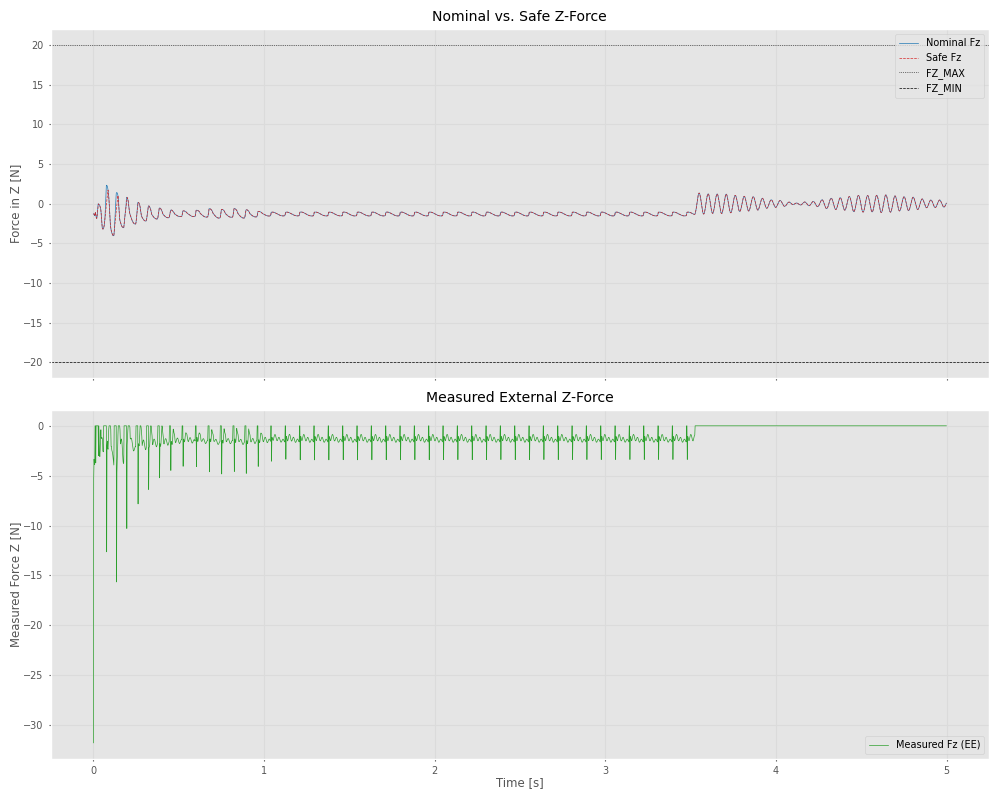

In [ ]:
import numpy as np
import mujoco
from tqdm import tqdm
from cvxopt import matrix, solvers
import matplotlib.pyplot as plt

# ----------------------------------------------------------------
# CVXOPT settings: Disable solver output for cleaner logs.
solvers.options['show_progress'] = False

# ----------------------------------------------------------------
# Impedance controller parameters
STIFFNESS = np.array([5000, 5000, 5000, 1000, 1000, 1000])
DAMPING_RATIO = 1  # Critical damping
DAMPING = 2 * DAMPING_RATIO * np.sqrt(STIFFNESS)

# Define safe limits for the z-force
FZ_MAX = 20.0   # maximum allowable force in z-direction [N]
FZ_MIN = -20.0  # minimum allowable force in z-direction [N]

# (Optional) compliance vector if needed
compliance_vector = np.array([1, 1, 1, 1, 1, 1])

# CBF parameter (for Lie derivative term)
lambda_cbf = 10.0  # you can tune this value

# Simulation parameters
duration = 5         # seconds
framerate = 30       # Hz
dt = ur5e.m.opt.timestep  # simulation timestep
n_steps = int(np.ceil(duration / dt))
showVideo = True

# ----------------------------------------------------------------
# Logging arrays
time_log     = []
Fz_nom_log   = np.zeros(n_steps)   # nominal z-force from impedance (EE frame)
Fz_safe_log  = np.zeros(n_steps)   # safe (projected) z-force (EE frame)
barrier_log  = np.zeros(n_steps)   # barrier function h = FZ_MAX - Fz_safe
Fz_meas_ee   = np.zeros(n_steps)   # measured external force in end-effector z
frames       = []                  # for video capture, if desired

# ----------------------------------------------------------------
# Reset the simulation
mujoco.mj_resetData(ur5e.m, ur5e.d)
ur5e.d.qpos[:] = sol.q
mujoco.mj_forward(ur5e.m, ur5e.d)

progress_bar = tqdm(total=duration)
idx = 0

# Initialize Fz_prev (for the CBF discrete-time condition)
Fz_prev = 0.0


# ----------------------------------------------------------------
# Main simulation loop
while ur5e.d.time < duration and idx < n_steps:
    progress_bar.update(dt)
    
    # Get current end-effector pose (tcp_pos)
    tcp_pos = ur5e.fkine(ur5e.d.qpos)
    # Rotation matrix from base frame to EE frame:
    # tcp_pos.R is typically a 3x3 orientation from base to end-effector.
    R_ee_in_base = tcp_pos.R  

    # Get the Jacobian (for base->EE velocity mapping)
    J = ur5e.jacob0(ur5e.d.qpos)

    # (Optional) DLS for robust inversion if needed
    lambda_damp = 0.01
    if np.abs(np.linalg.det(J)) <= 0.001:
        J_inv = J.T @ np.linalg.inv(J @ J.T + lambda_damp**2 * np.eye(J.shape[0]))
    else:
        J_inv = np.linalg.pinv(J)

    # ----------------------------------------------------------------
    # (1) Measure external force in the BASE frame
    f_ext_base = np.zeros(6)
    contact_points, contact_forces, _, _, _ = ur5e.get_contact_info()
    if len(contact_forces):
        f_ext_base[:3] = contact_forces[0]  # x,y,z in base frame
    
    # (2) Transform the base-frame 3D force into the END-EFFECTOR frame
    #     ignoring torques for simplicity. 
    #     R_ee_in_base is the orientation from base->EE, so:
    #        f_ext_ee = R_ee_in_base^T * f_ext_base_xyz
    f_ext_ee_3 = R_ee_in_base.T @ f_ext_base[:3]
    # We only log the z-component
    Fz_meas_ee[idx] = f_ext_ee_3[2]

    # ----------------------------------------------------------------
    # Define a small desired motion to see if the robot moves
    x_diff = [0.1 * (1 - np.cos(n_steps*0.01)), 0, 0.03 * (1 - np.cos(n_steps*0.01)), 0, 0, 0]
    target_pose = tcp_pos * sm.SE3.Trans(x_diff[0], x_diff[1], x_diff[2])
    error_in_base_frame = np.concatenate((target_pose.t - tcp_pos.t, np.zeros(3)))  # 6D error

    # Cartesian velocity in base frame
    v_e = J @ ur5e.d.qvel

    # ----------------------------------------------------------------
    # (3) Impedance wrench in the END-EFFECTOR frame or base frame?
    #     Let's do it in the EE frame for clarity. So we must transform
    #     the error from base->EE as well if we want full consistency.
    #     However, for a minimal fix, we'll do it in the base frame
    #     and treat "z" as the base z. Then unify the measured force
    #     by also using the base frame's z. That might be simpler.
    # 
    # For demonstration, let's keep the original approach:
    wrench_base = STIFFNESS * error_in_base_frame - DAMPING * v_e
    # Nominal z in the BASE frame is wrench_base[2].
    Fz_nominal = wrench_base[2]
    c = min(FZ_MAX, Fz_prev + dt * lambda_cbf * (FZ_MAX - Fz_prev))
    n = 1  # scalar problem
    P = 2 * np.eye(n)
    q = -2 * np.array([Fz_nominal])
    # Constraints: Fz_safe <= c and -Fz_safe <= -FZ_MIN (i.e. Fz_safe >= FZ_MIN)
    G = np.vstack(( np.array([[1.0]]), np.array([[-1.0]]) ))
    h = np.hstack(( np.array([c]), np.array([-FZ_MIN]) ))
    
    # Convert to cvxopt matrices and solve
    P_cvx = matrix(P)
    q_cvx = matrix(q)
    G_cvx = matrix(G)
    h_cvx = matrix(h)
    sol_qp = solvers.qp(P_cvx, q_cvx, G_cvx, h_cvx)
    Fz_safe = np.array(sol_qp['x']).flatten()[0]
    # (4) CBF projection in base frame for the z-axis

    # Build a safe wrench by replacing only the z-component
    wrench_safe_base = wrench_base.copy()
    wrench_safe_base[2] = Fz_safe

    # (5) Convert that safe wrench into joint torques
    tau = J.T @ wrench_safe_base

    # Optionally add dynamic compensation
    mass_matrix = np.zeros((6, 6))
    mujoco.mj_fullM(ur5e.m, mass_matrix, ur5e.d.qM)
    coriolis_forces = ur5e.d.qfrc_bias.copy()
    tau += mass_matrix @ ur5e.d.qacc + coriolis_forces

    # ----------------------------------------------------------------
    # Log data
    time_log.append(ur5e.d.time)
    Fz_nom_log[idx]  = Fz_nominal
    Fz_safe_log[idx] = Fz_safe
    barrier_log[idx] = FZ_MAX - Fz_safe  # should be >= 0 if safe

    # Apply the joint torque command
    ur5e.d.ctrl[:] = tau

    # (Optional) Capture video frames
    if len(frames) < ur5e.d.time * framerate:
        renderer.update_scene(ur5e.d, camera="fixed4", scene_option=dict())
        pixels = renderer.render()
        frames.append(pixels)

    # Step the simulation
    mujoco.mj_step(ur5e.m, ur5e.d)
    Fz_prev = Fz_safe
    idx += 1

progress_bar.close()

# ----------------------------------------------------------------
# Plot the results
time_log = np.array(time_log)

fig, axs = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# 1) Compare nominal vs. safe z-force in the base frame
axs[0].plot(time_log, Fz_nom_log, label='Nominal Fz', color='tab:blue')
axs[0].plot(time_log, Fz_safe_log, label='Safe Fz', color='tab:red', linestyle='--')
axs[0].axhline(FZ_MAX, color='k', linestyle=':', label='FZ_MAX')
axs[0].axhline(FZ_MIN, color='k', linestyle='--', label='FZ_MIN')
axs[0].set_ylabel('Force in Z [N]')
axs[0].set_title('Nominal vs. Safe Z-Force')
axs[0].legend(loc='best')

# 2) Compare measured Fz in the end-effector frame
axs[1].plot(time_log, Fz_meas_ee, label='Measured Fz (EE)', color='tab:green')
axs[1].set_ylabel('Measured Force Z [N]')
axs[1].set_xlabel('Time [s]')
axs[1].set_title('Measured External Z-Force')
axs[1].legend(loc='best')

plt.tight_layout()
plt.show()

# Optionally display video
if showVideo:
    media.show_video(frames, fps=framerate)


# Test med impedance force i end-effector

import numpy as np
import mujoco
from tqdm import tqdm
from cvxopt import matrix, solvers
import matplotlib.pyplot as plt

# ----------------------------------------------------------------
# CVXOPT settings: Disable solver output for cleaner logs.
solvers.options['show_progress'] = False

# ----------------------------------------------------------------
# Impedance controller parameters
STIFFNESS = np.array([5000, 5000, 5000, 1000, 1000, 1000])
DAMPING_RATIO = 1  # Critical damping
DAMPING = 2 * DAMPING_RATIO * np.sqrt(STIFFNESS)

# Define safe limits for the z-force
FZ_MAX = 200.0   # maximum allowable force in z-direction [N]
FZ_MIN = -200.0  # minimum allowable force in z-direction [N]

# (Optional) compliance vector if needed
compliance_vector = np.array([1, 1, 1, 1, 1, 1])

# CBF parameter (for Lie derivative term)
lambda_cbf = 10.0  # you can tune this value

# Simulation parameters
duration = 5         # seconds
framerate = 30       # Hz
dt = ur5e.m.opt.timestep  # simulation timestep
n_steps = int(np.ceil(duration / dt))
showVideo = True

# ----------------------------------------------------------------
# Logging arrays
time_log     = []
Fz_nom_log   = np.zeros(n_steps)   # nominal z-force from impedance (EE frame)
Fz_safe_log  = np.zeros(n_steps)   # safe (projected) z-force (EE frame)
barrier_log  = np.zeros(n_steps)   # barrier function h = FZ_MAX - Fz_safe
Fz_meas_ee   = np.zeros(n_steps)   # measured external force in end-effector z
frames       = []                  # for video capture, if desired

# ----------------------------------------------------------------
# Reset the simulation
mujoco.mj_resetData(ur5e.m, ur5e.d)
ur5e.d.qpos[:] = sol.q
mujoco.mj_forward(ur5e.m, ur5e.d)

progress_bar = tqdm(total=duration)
idx = 0

# Initialize Fz_prev (for the CBF discrete-time condition)
Fz_prev = 0.0


# ----------------------------------------------------------------
# Main simulation loop
while ur5e.d.time < duration and idx < n_steps:
    progress_bar.update(dt)
    
    # Get current end-effector pose (tcp_pos)
    tcp_pos = ur5e.fkine(ur5e.d.qpos)
    # Rotation matrix from base frame to EE frame:
    # tcp_pos.R is typically a 3x3 orientation from base to end-effector.
    R_ee_in_base = tcp_pos.R  

    # Get the Jacobian (for base->EE velocity mapping)
    J = ur5e.jacob0(ur5e.d.qpos)

    # (Optional) DLS for robust inversion if needed
    lambda_damp = 0.01
    if np.abs(np.linalg.det(J)) <= 0.001:
        J_inv = J.T @ np.linalg.inv(J @ J.T + lambda_damp**2 * np.eye(J.shape[0]))
    else:
        J_inv = np.linalg.pinv(J)

    # ----------------------------------------------------------------
    # (1) Measure external force in the BASE frame
    f_ext_base = np.zeros(6)
    contact_points, contact_forces, _, _, _ = ur5e.get_contact_info()
    if len(contact_forces):
        f_ext_base[:3] = contact_forces[0]  # x,y,z in base frame
    
    # (2) Transform the base-frame 3D force into the END-EFFECTOR frame
    #     ignoring torques for simplicity. 
    #     R_ee_in_base is the orientation from base->EE, so:
    #        f_ext_ee = R_ee_in_base^T * f_ext_base_xyz
    f_ext_ee_3 = R_ee_in_base.T @ f_ext_base[:3]
    # We only log the z-component
    Fz_meas_ee[idx] = f_ext_ee_3[2]

    # ----------------------------------------------------------------
    # Define a small desired motion to see if the robot moves
    x_diff = [0.1 * (1 - np.cos(n_steps*0.01)), 0, 0.03 * (1 - np.cos(n_steps*0.01)), 0, 0, 0]
    target_pose = tcp_pos * sm.SE3.Trans(x_diff[0], x_diff[1], x_diff[2])
    error_in_base_frame = np.concatenate((target_pose.t - tcp_pos.t, np.zeros(3)))  # 6D error

    # Cartesian velocity in base frame
    error_ee = np.zeros(6)
    error_ee[:3] = R_ee_in_base.T @ error_in_base_frame[:3]
    error_ee[3:] = error_in_base_frame[3:]  # rotation error (remains zero here)

    # Compute the Cartesian velocity (from the base frame) and then transform its linear part to the EE frame
    v_e = J @ ur5e.d.qvel
    v_e_ee = np.zeros(6)
    v_e_ee[:3] = R_ee_in_base.T @ v_e[:3]
    v_e_ee[3:] = v_e[3:]

    # ----------------------------------------------------------------
    # (3) Impedance wrench in the END-EFFECTOR frame or base frame?
    #     Let's do it in the EE frame for clarity. So we must transform
    #     the error from base->EE as well if we want full consistency.
    #     However, for a minimal fix, we'll do it in the base frame
    #     and treat "z" as the base z. Then unify the measured force
    #     by also using the base frame's z. That might be simpler.
    # 
    # For demonstration, let's keep the original approach:
    wrench_ee = STIFFNESS * error_ee - DAMPING * v_e_ee
    Fz_nominal = wrench_ee[2]  # nominal z-force in the EE frame
    c = min(FZ_MAX, Fz_prev + dt * lambda_cbf * (FZ_MAX - Fz_prev))
    n = 1  # scalar problem
    P = 2 * np.eye(n)
    q = -2 * np.array([Fz_nominal])
    # Constraints: Fz_safe <= c and -Fz_safe <= -FZ_MIN (i.e. Fz_safe >= FZ_MIN)
    G = np.vstack(( np.array([[1.0]]), np.array([[-1.0]]) ))
    h = np.hstack(( np.array([c]), np.array([-FZ_MIN]) ))
    
    # Convert to cvxopt matrices and solve
    P_cvx = matrix(P)
    q_cvx = matrix(q)
    G_cvx = matrix(G)
    h_cvx = matrix(h)
    sol_qp = solvers.qp(P_cvx, q_cvx, G_cvx, h_cvx)
    Fz_safe = np.array(sol_qp['x']).flatten()[0]
    # (4) CBF projection in base frame for the z-axis

    # Build a safe wrench by replacing only the z-component
    wrench_safe_ee = wrench_ee.copy()
    wrench_safe_ee[2] = Fz_safe

    # (5) Convert that safe wrench into joint torques
    wrench_safe_base = wrench_safe_ee.copy()
    wrench_safe_base[:3] = R_ee_in_base @ wrench_safe_ee[:3]
    wrench_safe_base[3:] = R_ee_in_base @ wrench_safe_ee[3:]

    # (5) Convert that safe wrench into joint torques
    tau = J.T @ wrench_safe_base

    # Optionally add dynamic compensation
    mass_matrix = np.zeros((6, 6))
    mujoco.mj_fullM(ur5e.m, mass_matrix, ur5e.d.qM)
    coriolis_forces = ur5e.d.qfrc_bias.copy()
    tau += mass_matrix @ ur5e.d.qacc + coriolis_forces

    # ----------------------------------------------------------------
    # Log data
    time_log.append(ur5e.d.time)
    Fz_nom_log[idx]  = Fz_nominal
    Fz_safe_log[idx] = Fz_safe
    barrier_log[idx] = FZ_MAX - Fz_safe  # should be >= 0 if safe

    # Apply the joint torque command
    ur5e.d.ctrl[:] = tau

    # (Optional) Capture video frames
    if len(frames) < ur5e.d.time * framerate:
        renderer.update_scene(ur5e.d, camera="fixed4", scene_option=dict())
        pixels = renderer.render()
        frames.append(pixels)

    # Step the simulation
    mujoco.mj_step(ur5e.m, ur5e.d)
    Fz_prev = Fz_safe
    idx += 1

progress_bar.close()

# ----------------------------------------------------------------
# Plot the results
time_log = np.array(time_log)

fig, axs = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# 1) Compare nominal vs. safe z-force in the base frame
axs[0].plot(time_log, Fz_nom_log, label='Nominal Fz (base)', color='tab:blue')
axs[0].plot(time_log, Fz_safe_log, label='Safe Fz (base)', color='tab:red', linestyle='--')
axs[0].axhline(FZ_MAX, color='k', linestyle=':', label='FZ_MAX')
axs[0].axhline(FZ_MIN, color='k', linestyle='--', label='FZ_MIN')
axs[0].set_ylabel('Force in Z [N] (base frame)')
axs[0].set_title('Nominal vs. Safe Z-Force (Base Frame)')
axs[0].legend(loc='best')

# 2) Compare measured Fz in the end-effector frame
axs[1].plot(time_log, Fz_meas_ee, label='Measured Fz (EE)', color='tab:green')
axs[1].set_ylabel('Measured Force Z [N] (EE frame)')
axs[1].set_xlabel('Time [s]')
axs[1].set_title('Measured External Z-Force (End-Effector Frame)')
axs[1].legend(loc='best')

plt.tight_layout()
plt.show()

# Optionally display video
if showVideo:
    media.show_video(frames, fps=framerate)
